In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from speck import SpeckCipher

In [2]:
mnist = np.load('mnist.npz')

In [3]:
train_X = mnist['x_train']
train_y = mnist['y_train']

test_X = mnist['x_test']
test_y = mnist['y_test']

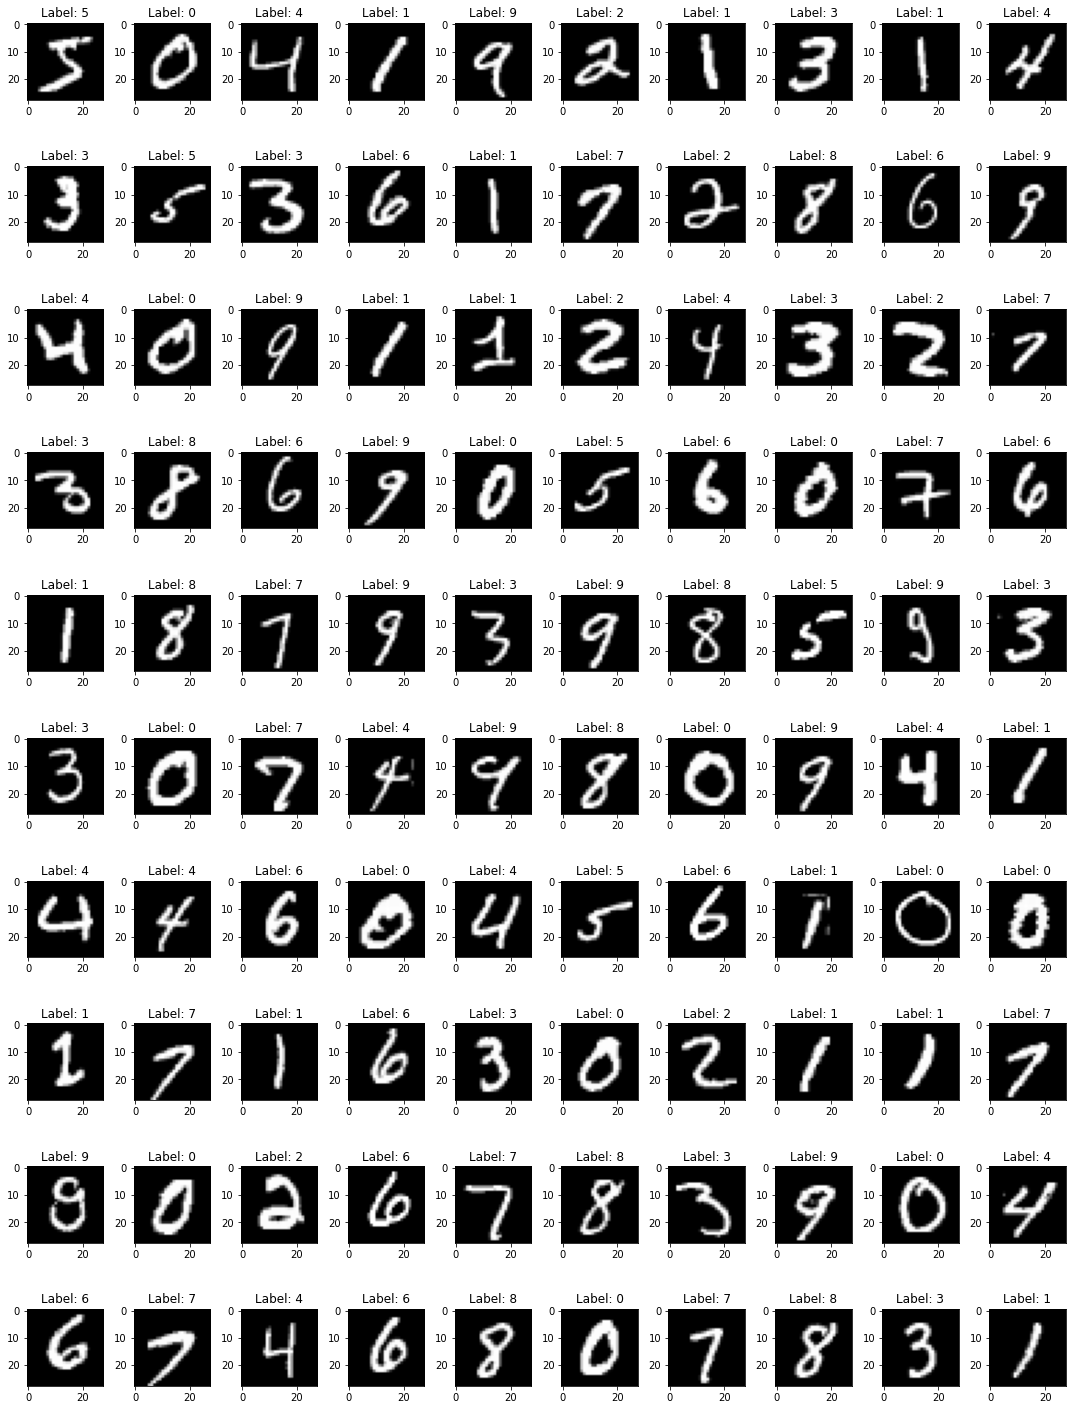

In [4]:
num_row = 10
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(100):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_X[i], cmap='gray')
    ax.set_title('Label: {}'.format(train_y[i]))
plt.tight_layout()
plt.show()

In [6]:
my_speck = SpeckCipher(0x123456789ABCDEFF, key_size=64, block_size=32)

In [7]:
#accepts train_X[i]
def flatten(unflat_data):
  dim1_arr = []

  for i in range(len(unflat_data)):
    for j in range(len(unflat_data[i])):
      dim1_arr.append(unflat_data[i][j])

  return dim1_arr

In [8]:
#Converts 1D array back to 2D array

def unflatten(dim1_arr, x, y):
  final_X_data = [[0 for _ in range(y)] for _ in range(x)]
  dim1_arr.reverse()

  for i in range(x):
    for j in range(y):
      final_X_data[i][j] = dim1_arr.pop()

  return final_X_data

In [9]:
#convert to 2D 4 x N
def convert_4x196(dim1_arr):
  x = int(len(dim1_arr) / 4)
  y = 4

  speck_enc4D = [[0 for _ in range(y)] for _ in range(x)]

  ind = 0

  for i in range(x):
    for j in range(y):
      speck_enc4D[i][j] = dim1_arr[ind]
      ind = ind + 1

  return speck_enc4D

In [10]:
def convert_1x784(speck_enc4D):
  #convert to 2D 4 x N back to 1D array
  speck_enc4D_1D = []

  x = int(len(speck_enc4D))
  y = 4

  ind = 0

  for i in range(x):
    for j in range(y):
        speck_enc4D_1D.append(speck_enc4D[i][j])

  return speck_enc4D_1D

In [11]:
def encrypt_speck(speck_enc4D):
  #ENCRYPT 4X ARRAY
  ind = 0
  for i in speck_enc4D:

    #convert to INT
    int_val = int.from_bytes(i, "little")

    #encrypt
    enc = my_speck.encrypt(int_val)

    #convert back to byte array
    to_bytes = enc.to_bytes(4, byteorder ='little')
    speck_enc4D[ind] = list(to_bytes)

    ind = ind + 1

  return speck_enc4D

In [12]:
images_present = train_X
labels_present = train_y

In [15]:
#SPECK ENCRYPTION PROCESS:
index = 0
for i in images_present:

  flat_arr = flatten(i)
  convert_4x = convert_4x196(flat_arr)
  enc = encrypt_speck(convert_4x)
  flatten_4x = convert_1x784(enc)
  unflat_arr = unflatten(flatten_4x, len(i), len(i[0]))
  images_present[index] = unflat_arr
  index = index + 1

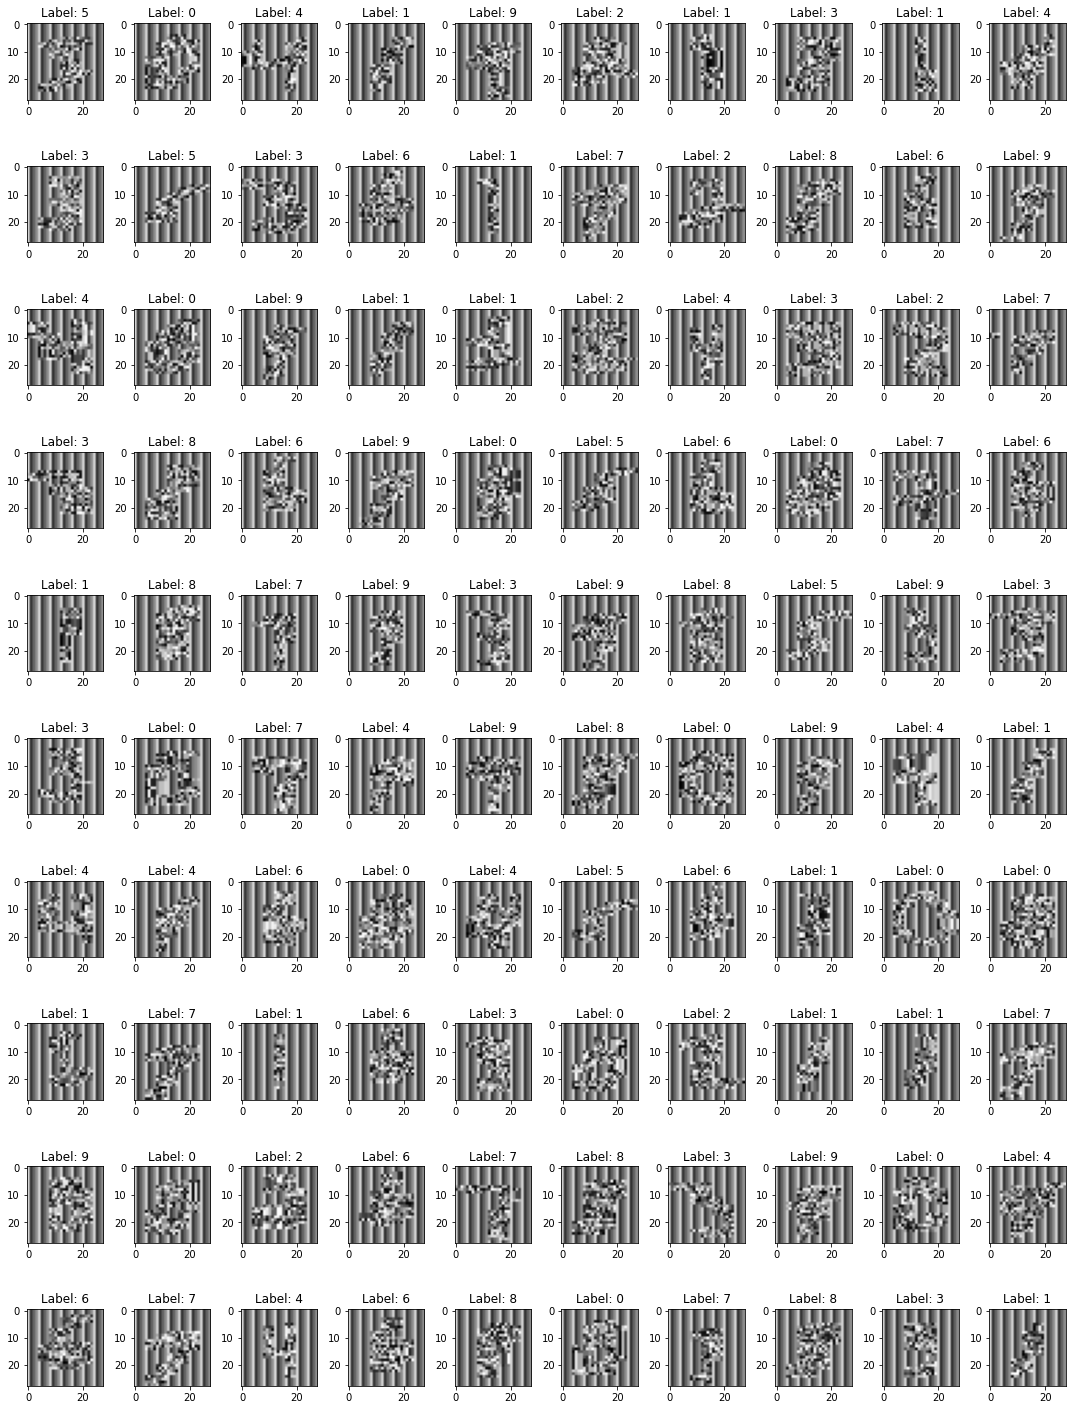

In [16]:
num_row = 10
num_col = 10
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(100):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images_present[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels_present[i]))
plt.tight_layout()
plt.show()

In [23]:
with open('speck.pkl', 'wb') as f:
    pickle.dump(images_present, f)